In [28]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pixiedust

%matplotlib inline

print("Libraries are loaded succesfully")

Libraries are loaded succesfully


In [29]:
path_text_file = r"C:\Users\Cagri\Google Drive\Self Study\Andrew NG Coursera\CourseraML-master\ex1\data\ex1data1.txt"

# 1. Load the data file

In [30]:
import csv

with open(path_text_file) as inf:
    reader = csv.reader(inf, delimiter=",")
    profit = list(list(zip(*reader))[1])
    
with open(path_text_file) as inf:
    reader = csv.reader(inf, delimiter=",")
    population = list(list(zip(*reader))[0])

# 2. Convert the cell types to float and transform them into matrices (initially they were in string format)

In [31]:
X = np.array(population).astype(np.float)
Y = np.array(profit).astype(np.float)

# 3. Visualise X (Population of a city) and Y (Profit of a food truck) by using a scatter plot

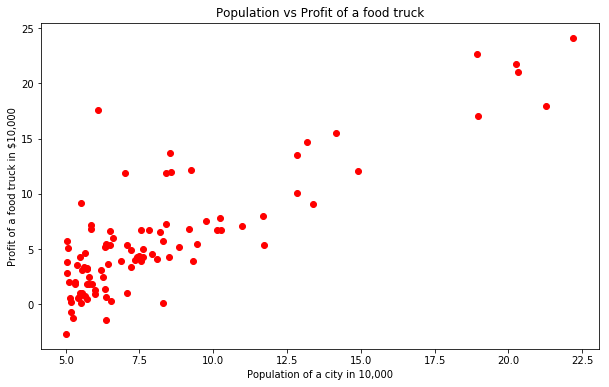

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, c="r")

plt.title("Population vs Profit of a food truck")
plt.xlabel("Population of a city in 10,000")
plt.ylabel("Profit of a food truck in $10,000");

# 4. The reason for the error in cell In[7] is explained in In[8]:

In [33]:
#X = np.concatenate((theta_1_c, X), axis=1)

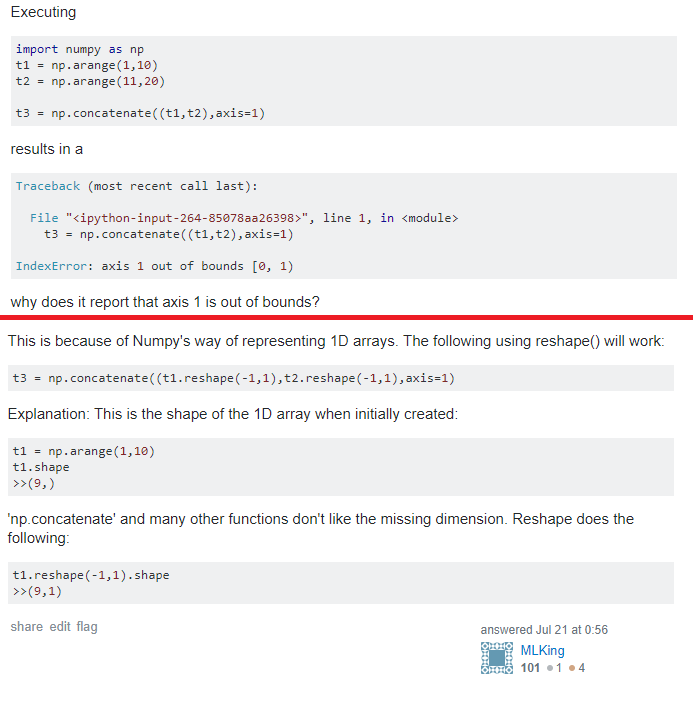

In [34]:
Image(filename='error_1_reshape.png')

# 5. Add theta_0 coefficients to the X matrix which is `1`

In [35]:
theta_1_c = np.full((X.shape[0]), 1)
X = np.concatenate((theta_1_c.reshape(-1,1), X.reshape(-1,1)), axis=1)
X.shape[:]

(97, 2)

In [36]:
iterations = 1500
alpha = 0.01

#  6. Define the Cost Function

`In the function below, if the initial theta values are not passed the function takes zeros as the initial values.` <br/><br/>
`The same function is also capable of working with more than one variable.`

---

In [37]:
def cost_function(X,Y,thetas = np.zeros(2)):

    h_theta_x =np.dot(X, thetas)

    return np.sum(((h_theta_x - Y)**2)/(Y.shape[0]*2))

cost_function(X,Y)

32.072733877455676

# 7. Define the Gradiend Descent function

In [38]:
def gradient_descent(X,Y,theta = np.zeros(X.shape[1])):
    
    theta_list = []
    cost_function_values = []
    m = X.shape[0]

    for i in range(iterations):
        h_theta_x = np.dot(X, theta)
        error = h_theta_x - Y
        
        cost_function_values.append(np.sum(((h_theta_x - Y)**2)/(m*2)))
        
        for j in range(theta.size):
            theta[j] = theta[j] - (alpha/m)*np.dot(error, X.transpose()[j]) # watch out for the transpose here.
            
        theta_list.append(list(theta)) #If you do not cast the theta values to a list, theta_list returns the wrong list.
        
    return theta_list, cost_function_values

theta_list, cost_function_values = gradient_descent(X,Y)

In [39]:
theta_list[-1]

[-3.63029143940436, 1.166362350335582]

In [40]:
y_hat

array([ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
        6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
        3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
        2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
        3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
       18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
        2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
        5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
        2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
        4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
        5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
        3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
        6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
        4.78874528,  6.04480089,  8.30859358,  2.78400167, 20.09

# 8. Multiply the X values with the calculated theta coefficients the calculate the  y_hat

In [26]:
y_hat = theta_list[-1]*X
y_hat = np.sum(y_hat, axis=1)

# 9. Plot the regression line

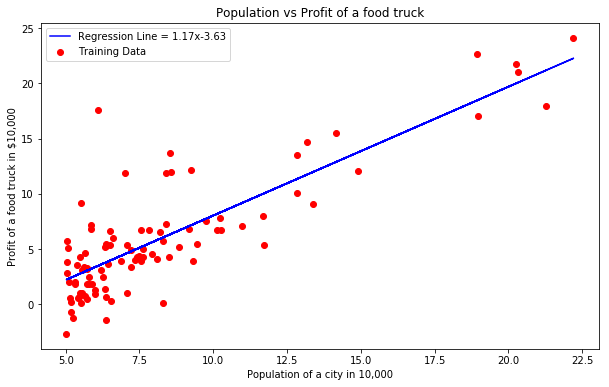

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], Y, c="r")

plt.title("Population vs Profit of a food truck")
plt.xlabel("Population of a city in 10,000")
plt.ylabel("Profit of a food truck in $10,000");

plt.plot(X[:,1], y_hat, c="b")

plt.legend(["Regression Line = 1.17x-3.63","Training Data"])

# 10. Plot the Cost Function against the Number of Iterations

Text(0,0.5,'Cost function')

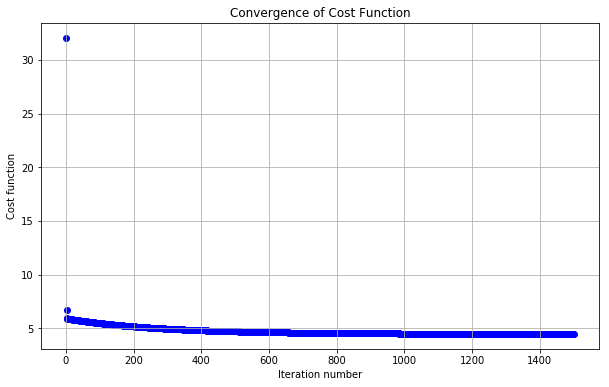

In [16]:
cost_function_values_a = np.array(cost_function_values)
iterations_a = np.array(range(1,1501))

plt.figure(figsize=(10,6))

plt.scatter(iterations_a, cost_function_values_a, c = "b")
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")